In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Loading data from files


## Using CSV

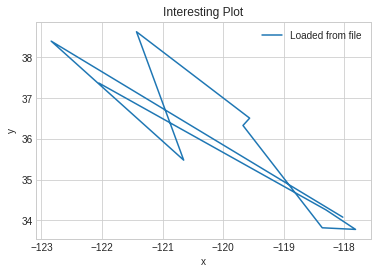

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import csv

x = []
y = []

#Opening a txt/csv file
with open('sample_data/california_housing_test.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[0])
        y.append(row[1])

x1 = []
y1 = []
for i in range(10):             #Plotting first 10 data excluding title
    x1.append(float(x[i+1]))
    y1.append(float(y[i+1]))


plt.plot(x1,y1,label = 'Loaded from file')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Plot')
plt.legend()
plt.show()

## Loading with Numpy

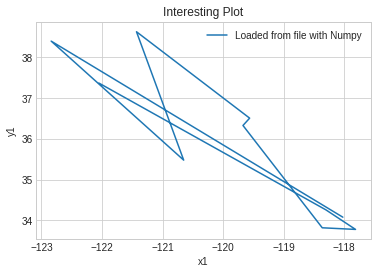

In [ ]:
import numpy as np

#Opening a txt/csv file. Any file with text in it
x, y, z, a, b, c, e, f, g = np.loadtxt('sample_data/california_housing_test.csv',dtype='str',delimiter=',',unpack='True') 
#Unpacking returns the elements in respective arrays. The number of variables should be same

#Slicing Numpy array
x1 = x[1:11]
y1 = y[1:11]

#Converting numpy array datatype
plt.plot(x1.astype(float),y1.astype(float),label = 'Loaded from file with Numpy')

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Interesting Plot')
plt.legend()
plt.show()

### Checking the type of data in the list

In [ ]:
print(type(x[1]))

<class 'str'>


In [ ]:
print(len(x[1]))

11


# Converting data from Internet

We are using Pandas datareader to get the stock data, which is a much better way then to do it ourselves using API


## Using Pandas

We use the datareader which returns a dataframe. We can check the different datatypes of the individual column and the complete dataset as follows

In [4]:
import urllib
import matplotlib.dates as mdates
import pandas_datareader as data
from datetime import datetime

required = data.get_data_yahoo('TSLA',start=datetime(2019, 4, 5),end=datetime(2020, 4, 7))

In [ ]:
required.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [ ]:
required

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-05,55.220001,53.222000,53.972000,54.992001,65191500,54.992001
2019-04-08,56.231998,54.088001,55.537998,54.639999,52052000,54.639999
2019-04-09,55.000000,53.922001,54.330002,54.462002,29520000,54.462002
2019-04-10,55.675999,54.577999,55.348000,55.212002,35306500,55.212002
2019-04-11,54.099998,53.119999,53.660000,53.683998,49179500,53.683998
...,...,...,...,...,...,...
2020-04-01,102.790001,95.019997,100.800003,96.311996,66766000,96.311996
2020-04-02,98.851997,89.279999,96.206001,90.893997,99292000,90.893997
2020-04-03,103.098000,93.678001,101.900002,96.001999,22562100,96.001999


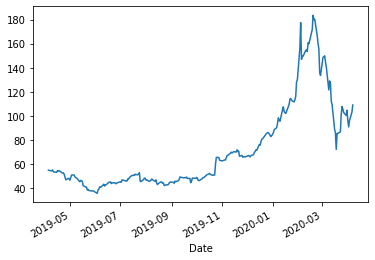

In [17]:
import matplotlib.pyplot as plt

plt.figure()
required['Close'].plot()  #We can access each column and plot it
                          #against the index column, i.e. date

We can also plot one column versus the other using the x and y keyword arguments in plot()

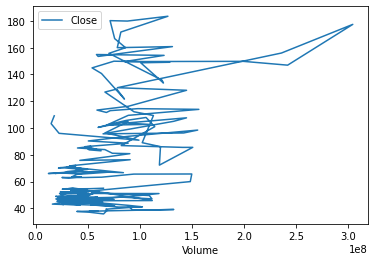

In [19]:
required.plot(y='Close',x='Volume')

required.plot() plots all the columns. However, we can also select multiple chosen columns to plot. Using subplot=True, we can separate the plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5949cac438>],
      dtype=object)

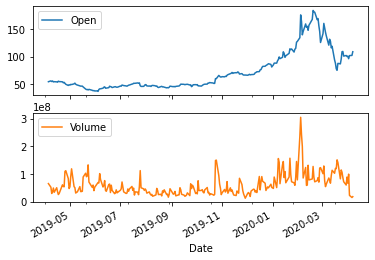

In [28]:
required[['Open','Volume']].plot(subplots=True, layout=(2,1))  #Remember to pass as array

Using secondary_y, we can normalize the two trends having different y value ranges

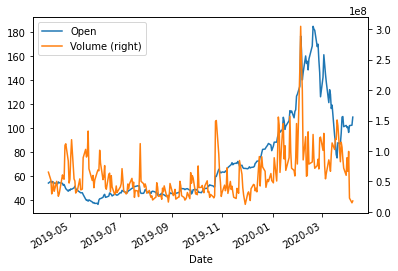

In [29]:
required[['Open','Volume']].plot(secondary_y='Volume')

## Without Pandas. Manually pulling from an url

In [30]:
## If done without Pandas
def graph_data(stock):
  return True

# def bytespdata2num(fmt, encoding='utf-8'):
#     strconverter = mdates.strpdate2num(fmt)
    
#     def bytesconverter(b):
#         s = b.decode(encoding)
#         return strconverter(s)
    
#     return bytesconverter

#     stock_price_url = '' #Whatever url

#     source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
#     stock_data = []
#     split_source = source_code.split('\n')
#     for line in split_source:
#         #split_line = line.split(',')
#         if len(split_line) == 6:
#             if 'values' not in line and 'labels' not in line:
#                 stock_data.append(line)

#     date, closep, highp, lowp, volume = np.loadtxt(stock_data, 
#                                                     delimiter = ',',
#                                                     unpack=True,
#                                                     # %Y = full year, 2015
#                                                     # %y = partial year 15
#                                                     # %m = number month
#                                                     # %d = number day
#                                                     # %H = hours
#                                                     # %M = minutes
#                                                     # %s = seconds
#                                                     # 12-06-2014: %d-%M-%Y
#                                                     converter={0: bytespdate2num('%Y%m%d')})
    

# graph_data('TSLA')

In [31]:
#plt.plot_date(date, closep,'-',label='Price')

#plt.xlabel('Date')
#plt.ylabel('Price')
#plt.title('Interesting Graph')
#plt.legend()
#plt.show()

## Working with Dataframes. 

Converting dataframe to numpy array

In [1]:
import pandas as pd

#initialize a dataframe
df = pd.DataFrame(
	[[21, 72, 67],
	[23, 78, 69],
	[32, 74, 56],
	[52, 54, 76]],
	columns=['a', 'b', 'c'])

print('DataFrame\n----------\n', df)

#convert dataframe to numpy array
arr = df.to_numpy()

print('\nNumpy Array\n----------\n', arr)

DataFrame
----------
     a   b   c
0  21  72  67
1  23  78  69
2  32  74  56
3  52  54  76

Numpy Array
----------
 [[21 72 67]
 [23 78 69]
 [32 74 56]
 [52 54 76]]
